In [8]:
# !pip install tensorflow==1.12.0

In [1]:
import tensorflow as tf
from matplotlib.pylab import plt
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
tf.set_random_seed(2121)
x = tf.random_uniform((100,1),0,1)
tf.set_random_seed(2122)
y = x*2.4+5+tf.random_normal((100,1),0,0.2)

In [8]:
a = tf.get_variable(name="weight", shape=[1]) 
b = tf.get_variable(name="bias", shape=[1]) 

ValueError: Variable weight already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-4-74aa9a4f7fbb>", line 1, in <module>
    a = tf.get_variable(name="weight", shape=[1])
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):


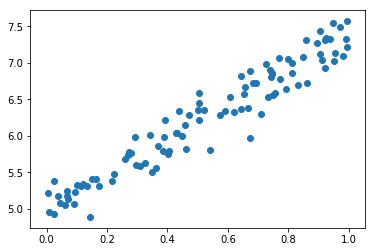

In [9]:
with tf.Session() as sess:
    x_numpy,y_numpy = sess.run([x,y])
    plt.scatter(x_numpy,y_numpy)

In [10]:
y_ = a*x+b

In [11]:
loss = tf.losses.mean_squared_error(y,y_)

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [18]:
def count_vals(vector, message='Vector:'):
    with tf.Session() as sess:
        print(message,'\n', sess.run(vector), '\n')

In [19]:
with tf.Session() as sess:
    count_vals(x, 'x')
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        sess.run(optimizer)
        if epoch%25==0:
            print(sess.run(loss))
    y_preds,x_preds = sess.run([y_,x])

x 
 [[0.4622401 ]
 [0.06732082]
 [0.36351955]
 [0.5753062 ]
 [0.09189022]
 [0.25922096]
 [0.7926825 ]
 [0.7258245 ]
 [0.81336963]
 [0.36799407]
 [0.10112381]
 [0.00798142]
 [0.6676645 ]
 [0.32444215]
 [0.14456546]
 [0.21677661]
 [0.97031033]
 [0.0380789 ]
 [0.745119  ]
 [0.02477551]
 [0.26908147]
 [0.9911994 ]
 [0.7736914 ]
 [0.9051249 ]
 [0.4394865 ]
 [0.76895404]
 [0.6938163 ]
 [0.28099656]
 [0.7096168 ]
 [0.02598333]
 [0.47126627]
 [0.54217637]
 [0.07123399]
 [0.34882748]
 [0.9388659 ]
 [0.12205184]
 [0.11301088]
 [0.592047  ]
 [0.90333724]
 [0.22255874]
 [0.34346247]
 [0.7413043 ]
 [0.65459347]
 [0.9200604 ]
 [0.4032359 ]
 [0.06754553]
 [0.52190626]
 [0.91038775]
 [0.89542484]
 [0.5035399 ]
 [0.9537039 ]
 [0.85768974]
 [0.1650058 ]
 [0.7981168 ]
 [0.9500537 ]
 [0.5013348 ]
 [0.29636884]
 [0.64410305]
 [0.73820245]
 [0.6218264 ]
 [0.00506961]
 [0.9464905 ]
 [0.60716426]
 [0.5032295 ]
 [0.29268742]
 [0.7445409 ]
 [0.15056896]
 [0.8125181 ]
 [0.9803015 ]
 [0.45724583]
 [0.27314627]
 [

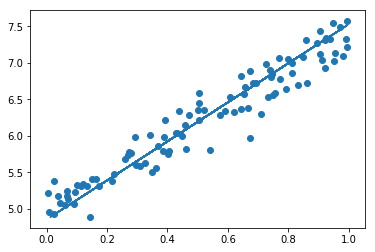

In [14]:
plt.scatter(x_numpy,y_numpy)
plt.plot(x_preds,y_preds)

In [24]:
# _____restart! 

In [1]:
import tensorflow as tf
from matplotlib.pylab import plt
%matplotlib inline

/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

In [3]:
tf.random.set_random_seed(2121)
x = tf.random_uniform((100,1),0,1)
tf.random.set_random_seed(2122)
y = x*2.4+5+tf.random_normal((100,1),0,0.2)

In [4]:
a = tf.get_variable(name="weight", shape=[1],trainable=True) 
b = tf.get_variable(name="bias", shape=[1],trainable=True) 

In [5]:
def lin_model(x):
    y_ = a*x+b
    return y_

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [7]:
for epoch in range(600):
    with tf.GradientTape() as tape:
        loss = tf.losses.mean_squared_error(y,lin_model(x))
        grads = tape.gradient(loss, [a,b])
        grads_and_vars = zip(grads, [a,b])
        optimizer.apply_gradients(grads_and_vars) 
    if epoch%25==0:    
        print(loss.numpy())

30.267118
0.17270982
0.11336814
0.08026631
0.061798397
0.051494937
0.045746498
0.042539373
0.040750094
0.039751813
0.039194874
0.038884167
0.038710788
0.038614072
0.03856011
0.03853001
0.03851322
0.038503837
0.038498603
0.038495705
0.038494065
0.038493164
0.03849265
0.038492363


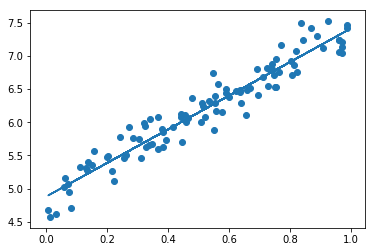

In [8]:
plt.scatter(x,y)
plt.plot(x.numpy(),lin_model(x).numpy())